<a href="https://colab.research.google.com/github/PeriAdan/Boston-Data-Sale-Prediction/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv ("/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/boston_data.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


# **Exploring the data and preparing for future functions**

In [5]:
df.shape

(404, 14)

In [6]:
df.info

<bound method DataFrame.info of          crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0     0.15876   0.0  10.81   0.0  0.413  ...  305.0     19.2  376.94   9.88  21.7
1     0.10328  25.0   5.13   0.0  0.453  ...  284.0     19.7  396.90   9.22  19.6
2     0.34940   0.0   9.90   0.0  0.544  ...  304.0     18.4  396.24   9.97  20.3
3     2.73397   0.0  19.58   0.0  0.871  ...  403.0     14.7  351.85  21.45  15.4
4     0.04337  21.0   5.64   0.0  0.439  ...  243.0     16.8  393.97   9.43  20.5
..        ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
399   9.32909   0.0  18.10   0.0  0.713  ...  666.0     20.2  396.90  18.13  14.1
400  51.13580   0.0  18.10   0.0  0.597  ...  666.0     20.2    2.60  10.11  15.0
401   0.01501  90.0   1.21   1.0  0.401  ...  198.0     13.6  395.52   3.16  50.0
402   0.02055  85.0   0.74   0.0  0.410  ...  313.0     17.3  396.90   5.77  24.7
403   0.08244  30.0   4.93   0.0  0.428  ...  300.0     16.6  379.

# **Cleaning data and checking for missign values**

In [7]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [8]:
df.nunique()

crim       402
zn          25
indus       69
chas         2
nox         76
rm         363
age        298
dis        339
rad          9
tax         61
ptratio     45
black      292
lstat      366
medv       200
dtype: int64

In [9]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


# **Visualizing the data**

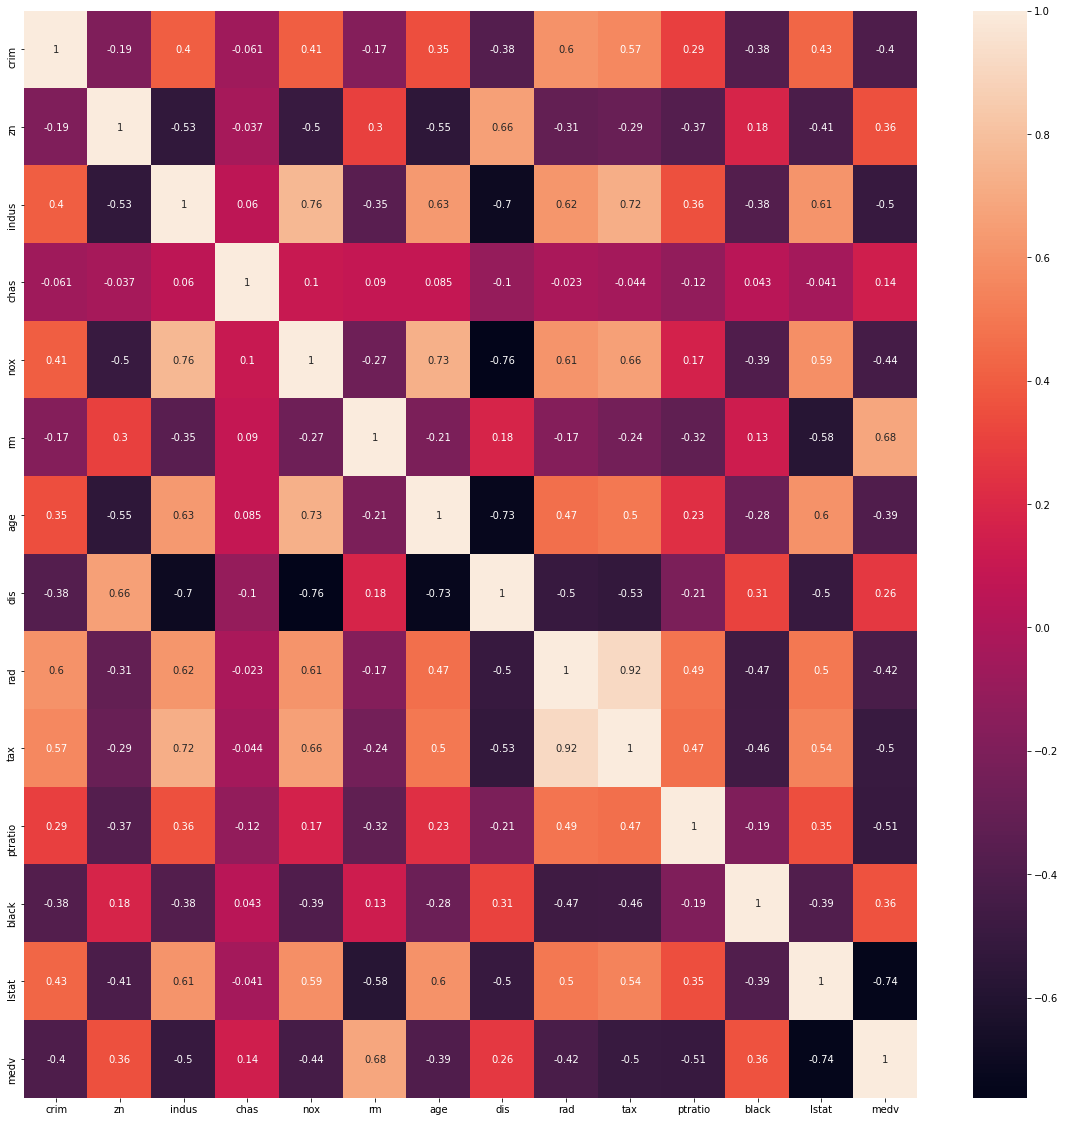

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


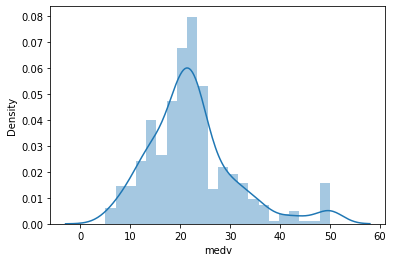

In [12]:
sns.distplot(df['medv'])

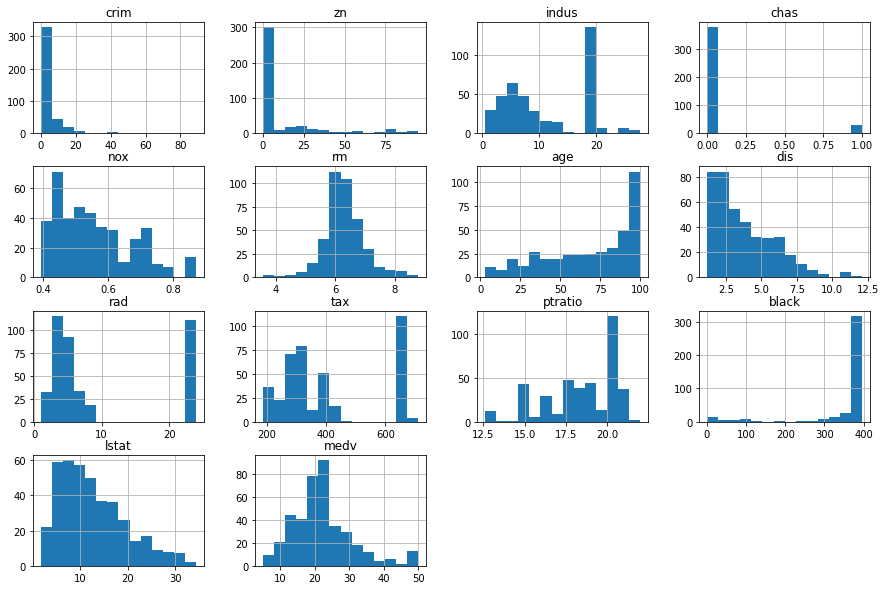

In [13]:
num_bins = 14

df.hist(bins=num_bins, figsize=(15,10))
plt.savefig("df_histogram_plots")
plt.show()

Text(0, 0.5, 'Number of Rooms')

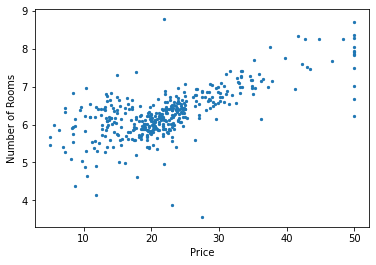

In [14]:
plt.scatter( df['medv'], df['rm'], s=5 )
plt.xlabel( "Price")
plt.ylabel( "Number of Rooms")

Text(0, 0.5, 'Lower Status of Population')

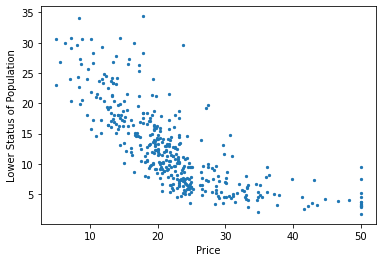

In [15]:
plt.scatter( df['medv'], df['lstat'], s=5 )
plt.xlabel( "Price")
plt.ylabel( "Lower Status of Population")

Text(0, 0.5, 'Student-Teacher Ratio')

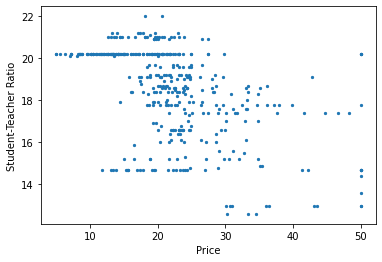

In [16]:
plt.scatter( df['medv'], df['ptratio'], s=5 )
plt.xlabel( "Price")
plt.ylabel( "Student-Teacher Ratio")

# **Creating ML Models**

In [17]:
#Importing Libraries

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

KNN **Model**

In [18]:
X = df.drop(columns = "medv")

In [19]:
X.shape

(404, 13)

In [20]:
y = df['medv'].values

In [21]:
y.shape

(404,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [23]:
print(X_train.shape)
print(X_test.shape)

(303, 13)
(101, 13)


In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
knn = KNeighborsRegressor()
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [26]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
score = knn.score(X_train,y_train)
score

0.8283969998977441

In [28]:
testscore = knn.score(X_test,y_test)
testscore

0.7148642211978952

In [29]:
y_pred = knn.predict(X_test)

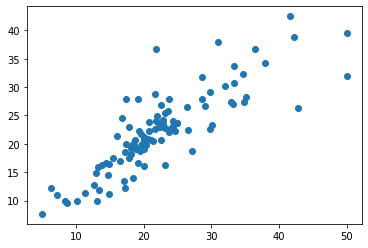

In [30]:
plt.scatter(y_test,y_pred)

**Linear Regression Model**

In [31]:
Ln = LinearRegression(fit_intercept=True)
Ln.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
trainscore = Ln.score(X_train, y_train)
trainscore

0.7508175223264282

In [33]:
Lntestscore = Ln.score(X_test, y_test)
Lntestscore

0.748470652382832

In [34]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
y_pred = reg.predict(X_train)

In [36]:
regscore = reg.score(X_train, y_train)
regscore

0.9786444204952457

In [37]:
regtest = reg.score(X_test, y_test)
regtest

0.7990019979161179